# Trabalho 1 - Nivelamento

Considere os datasets abaixo, estratégias de pré-processamento, medidas de avaliação, métodos de comparação estatística e os seguintes algoritmos de aprendizado de máquina: árvore de decisão, random forest e k-nearest neighbor. A partir disso, responda as seguintes perguntas:

1. Qual o algoritmo de AM mais adequado para cada problema?
2. Qual o algoritmo de AM mais adequado para todos os problemas?

Para responder essas questões construa um notebook no colab ou um ambiente similar. Documente de forma clara cada passo e justifique suas decisões.

### Datasets
Considere os seguintes datasets:

+ **Arrhythmia:** Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). [link](https://www.openml.org/search?type=data&sort=runs&id=1017&status=active)

+ **Airlines:** Airlines Dataset Inspired in the regression dataset from Elena Ikonomovska. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure. [link] (https://www.openml.org/search?type=data&sort=runs&id=1169&status=active)

+ **Phoneme:** The aim of this dataset is to distinguish between nasal (class 0) and oral sounds (class 1). Five different attributes were chosen to characterize each vowel: they are the amplitudes of the five first harmonics AHi, normalised by the total energy Ene (integrated on all the frequencies): AHi/Ene. The phonemes are transcribed as follows: sh as in she, dcl as in dark, iy as the vowel in she, aa as the vowel in dark, and ao as the first vowel in water. [link] (https://www.openml.org/search?type=data&sort=runs&id=1489&status=active)

+ **Phishing Websites:** One of the challenges faced by our research was the unavailability of reliable training datasets. In fact this challenge faces any researcher in the field. However, although plenty of articles about predicting phishing websites have been disseminated these days, no reliable training dataset has been published publically, may be because there is no agreement in literature on the definitive features that characterize phishing webpages, hence it is difficult to shape a dataset that covers all possible features. In this dataset, we shed light on the important features that have proved to be sound and effective in predicting phishing websites. [link](https://www.openml.org/search?type=data&sort=runs&id=4534&status=active)

+ **Satellite:** The satellite dataset comprises of features extracted from satellite observations. In particular, each image was taken under four different light wavelength, two in visible light (green and red) and two infrared images. The task of the original dataset is to classify the image into the soil category of the observed region. [link](https://www.openml.org/search?type=data&sort=runs&id=40900&status=active)

+ **Adult:** Prediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).[link](https://www.openml.org/search?type=data&sort=runs&id=1590&status=active)

+ **AedesSex:** This dataset has features of sounds gathered using a infrared sensor from _Ae. aegypti_ mosquitoes. The objetive is to classify males and females mosquitoes from their sounds. **Sex** feature is the label. [link](https://github.com/denismr/Classification-and-Counting-with-Recurrent-Contexts/blob/master/codeAndData/data/AedesSex.csv)



### Nome:

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import tree
from scipy.io import arff

In [2]:
df = arff.loadarff("dataset/arrhythmia.arff")
df = pd.DataFrame(df[0])
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,b'0',190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,b'N'
1,56.0,b'1',165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,b'N'
2,54.0,b'0',172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,b'N'
3,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'P'
4,75.0,b'0',190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,b'1',160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,b'P'
448,37.0,b'0',190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,b'N'
449,36.0,b'0',166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,b'N'
450,32.0,b'1',155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,b'P'


### Converter byte

In [3]:
df["binaryClass"] = df["binaryClass"].str.decode('utf-8') 
df["sex"] = pd.to_numeric(df["sex"].str.decode('utf-8'))

In [4]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,N
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,N
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,N
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,P
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,P
448,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,N
449,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,N
450,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,P


In [5]:
# pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False).head(10)
df.isnull().sum().sort_values( ascending=False).head(10)

J                  376
P                   22
T                    8
QRST                 1
heartrate            1
chAVR_SwaveAmp       0
chAVR_RwaveAmp       0
chAVR_QwaveAmp       0
chAVR_JJwaveAmp      0
chDIII_QRSTA         0
dtype: int64

##### "J" possui muitos valores nulos então este atributo será removido assim como o restante das linhas nulas

In [5]:
df.drop("J",axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

In [6]:
pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False).head(10)

,0
age,0
chDIII_PwaveAmp,0
chAVR_RwaveAmp,0
chAVR_QwaveAmp,0
chAVR_JJwaveAmp,0
chDIII_QRSTA,0
chDIII_QRSA,0
chDIII_TwaveAmp,0
chDIII_SPwaveAmp,0
chDII_TwaveAmp,0


In [7]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,N
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,N
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,N
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,P
5,13.0,0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,P
448,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,N
449,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,N
450,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,P


<AxesSubplot:>

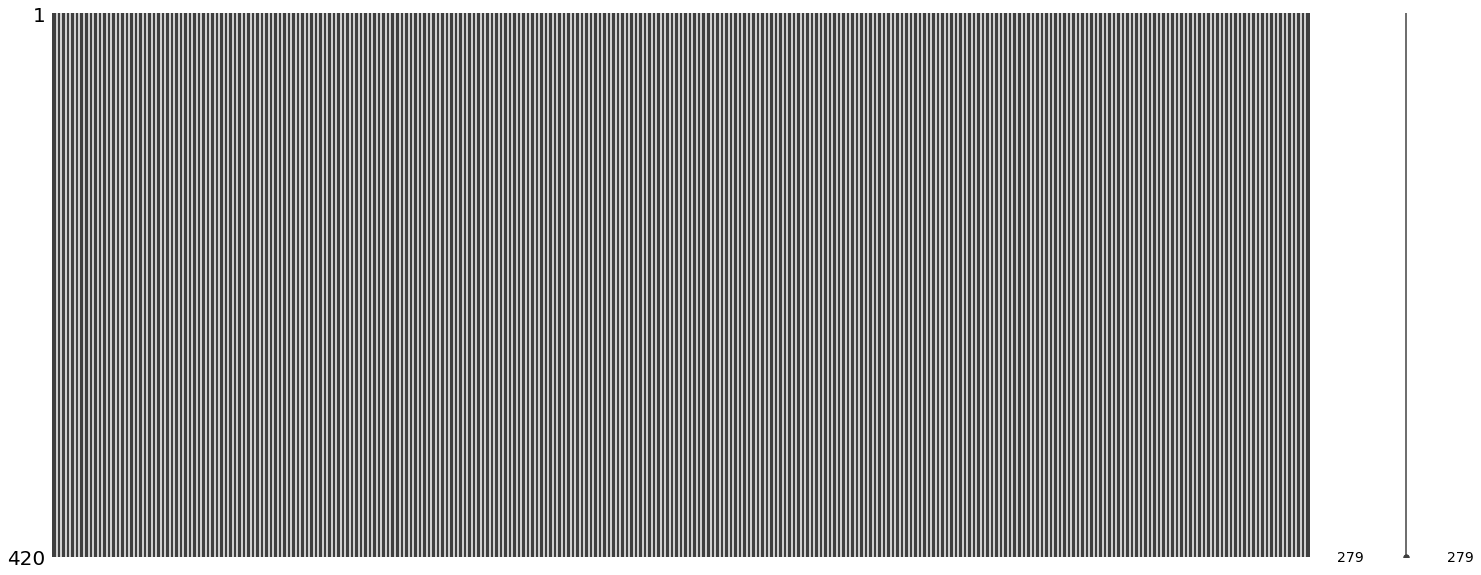

In [9]:
msno.matrix(df)

P    237
N    183
Name: binaryClass, dtype: int64


<AxesSubplot:title={'center':'Count (binaryClass)'}>

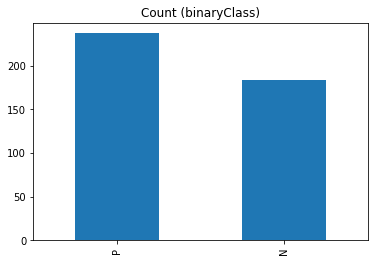

In [8]:
df_count_target = df['binaryClass'].value_counts()
# df_count_target

print(df_count_target)
df_count_target.plot(kind='bar', title='Count (binaryClass)')

### Normalizar

In [9]:
df['binaryClass'].replace(["N", "P"],[0,1], inplace=True)
df.shape

(420, 279)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.233333,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.0,0.53125,0.741667,0.507519,0.569579,0.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.140741,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.0,0.31250,0.675000,0.485714,0.500971,0.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.274074,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.0,0.34375,0.783333,0.424812,0.566990,0.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.251852,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.0,0.37500,0.716667,0.592481,0.648544,1.0
4,0.156627,0.0,0.094815,0.264706,0.338346,0.318702,0.321300,0.233333,0.443902,0.818182,...,0.853659,0.516949,0.902098,0.0,0.0,0.53125,0.683333,0.433835,0.451133,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.159259,0.570732,0.395894,...,1.000000,0.182203,0.825175,0.0,0.0,0.46875,0.550000,0.299248,0.246602,1.0
416,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.333333,0.356098,0.756598,...,1.000000,0.661017,0.944056,0.0,0.0,0.37500,0.700000,0.618045,0.653722,0.0
417,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.307407,0.565854,0.255132,...,1.000000,0.690678,0.000000,0.0,0.0,0.71875,0.583333,0.000000,0.034951,0.0
418,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.396296,0.307317,0.662757,...,0.902439,0.508475,0.975524,0.0,0.0,0.40625,0.700000,0.520301,0.551456,1.0


### Overssample SMOTE + Tomek

In [11]:
X_train = df.drop(['binaryClass'],axis=1)
y_train = df['binaryClass']

<AxesSubplot:title={'center':'Count (binaryClass)'}>

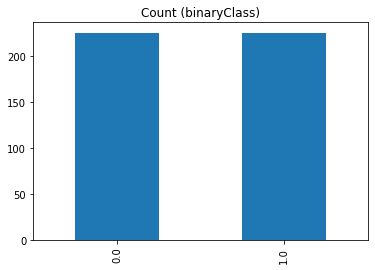

In [12]:
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(random_state=139)

X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

y_train_smtom.value_counts().plot(kind='bar', title='Count (binaryClass)')



In [15]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_train_smtom, y_train_smtom, test_size=0.1, random_state=42)

## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier()
k_range = list(range(1, 51))
param_grid = dict(n_neighbors=k_range)

model_arrhythmia_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)


model_arrhythmia_knn.fit(x_train, y_train)
y_pred = model_arrhythmia_knn.predict(x_test)

knn_accuracy_arrhythmia = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (knn_accuracy_arrhythmia * 100.0))

# scores_1 = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy')
# print("Cros: %.2f%%" % (scores_1.mean() * 100.0))


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Accuracy: 77.78%


In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# iris = datasets.load_iris()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters, cv=10 )
# clf.fit(iris.data, iris.target)

# list(range(1, 51))
knn = KNeighborsClassifier()
# k_range = {list(range(1, 51))}
# param_grid = dict(n_neighbors=k_range)

param_grid = {'n_neighbors':np.arange(1,2), 'weights':('uniform','distance'),'algorithm':('ball_tree','kd_tree','brute'),'p':[1,2]}
# param_grid

model_arrhythmia_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)


model_arrhythmia_knn.fit(x_train, y_train)
y_pred = model_arrhythmia_knn.predict(x_test)

knn_accuracy_arrhythmia = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (knn_accuracy_arrhythmia * 100.0))


# sorted(clf.grid_scores_)
# model_arrhythmia_knn.cv_results_

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Accuracy: 77.78%


In [18]:
model_arrhythmia_knn.cv_results_['mean_test_score'].mean() * 100

76.5548780487805

In [19]:
model_arrhythmia_knn.best_score_*100

77.54878048780489

In [20]:
pd.DataFrame(model_arrhythmia_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014408,0.001717,0.019128,0.003750,ball_tree,1,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.804878,...,0.780488,0.658537,0.825,0.7,0.75,0.725,0.800,0.755610,0.065079,7
1,0.010955,0.001236,0.013056,0.001810,ball_tree,1,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.804878,...,0.780488,0.658537,0.825,0.7,0.75,0.725,0.800,0.755610,0.065079,7
2,0.010035,0.000440,0.014320,0.000607,ball_tree,1,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.756098,...,0.707317,0.756098,0.850,0.8,0.75,0.775,0.775,0.775488,0.044977,1
3,0.010176,0.000737,0.011615,0.000715,ball_tree,1,2,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.756098,...,0.707317,0.756098,0.850,0.8,0.75,0.775,0.775,0.775488,0.044977,1
4,0.013561,0.001600,0.018282,0.002488,kd_tree,1,1,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.804878,...,0.780488,0.658537,0.825,0.7,0.75,0.725,0.800,0.755610,0.065079,7
5,0.012466,0.000388,0.013976,0.000401,kd_tree,1,1,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.804878,...,0.780488,0.658537,0.825,0.7,0.75,0.725,0.800,0.755610,0.065079,7
6,0.013394,0.001341,0.017211,0.001838,kd_tree,1,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.756098,...,0.707317,0.756098,0.850,0.8,0.75,0.775,0.775,0.775488,0.044977,1
7,0.013086,0.001370,0.014385,0.001768,kd_tree,1,2,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.756098,...,0.707317,0.756098,0.850,0.8,0.75,0.775,0.775,0.775488,0.044977,1
8,0.006560,0.000576,0.018468,0.002308,brute,1,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.804878,...,0.780488,0.658537,0.825,0.7,0.75,0.725,0.800,0.755610,0.065079,7
9,0.006309,0.000374,0.014849,0.000726,brute,1,1,distance,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.804878,...,0.780488,0.658537,0.825,0.7,0.75,0.725,0.800,0.755610,0.065079,7


In [21]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)
# knn = model_arrhythmia_knn.best_estimator_
knn

scores_1 = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy')
# print("Accuracy: %.2f%%" % (scores_1.mean() * 100.0))
scores_1.mean()

0.7754878048780489

In [34]:
def func_acuracy_grid_search(df, classe, metodo, param_grid ):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from imblearn.combine import SMOTETomek
    from sklearn.preprocessing import MinMaxScaler

    # Normalizar
    scaler = MinMaxScaler()
    df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


    # Train test
    X_train = df_normalizado.drop([classe],axis=1)
    y_train = df_normalizado[classe]

    # Resample SMOTE + Tomek
    smtom = SMOTETomek(random_state=139)
    X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)
    # y_train_smtom.value_counts().plot(kind='bar', title='Count (binaryClass)')

    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(X_train_smtom, y_train_smtom, test_size=0.1, random_state=42)


    # metodo = KNeighborsClassifier()
    # range = list(range(1, 51))
    # param_grid = dict(n_neighbors=k_range)

    model = GridSearchCV(metodo, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # accuracy = accuracy_score(y_test, y_pred)
    # print("Accuracy: %.2f%%" % (accuracy * 100.0))

    estimador = model.best_estimator_
    acuracia = cross_val_score(estimador, x_train, y_train, cv = 10, scoring = 'accuracy') 

    return acuracia, y_test, y_pred

def matrix_confusao(yTeste,yPred):
   conf_mat = confusion_matrix(y_true=yTeste, y_pred=yPred)
   print('Confusion matrix:\n', conf_mat)

   labels = ['Class 0', 'Class 1']
   fig = plt.figure()
   ax = fig.add_subplot(111)
   cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
   fig.colorbar(cax)
   ax.set_xticklabels([''] + labels)
   ax.set_yticklabels([''] + labels)
   plt.xlabel('Predicted')
   plt.ylabel('Expected')
   plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':np.arange(1,2), 'weights':('uniform','distance'),'algorithm':('ball_tree','kd_tree','brute'),'p':[1,2]}
knn = KNeighborsClassifier()
acuracia, y_test, y_pred = func_acuracy_grid_search(df, 'binaryClass',knn, param_grid)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Confusion matrix:
 [[18  7]
 [ 3 17]]


/tmp/ipykernel_473680/2311543596.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_473680/2311543596.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


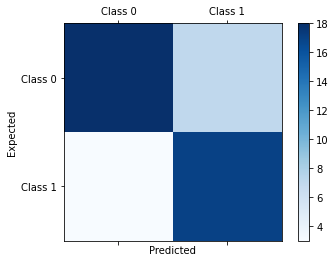

In [38]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

matrix_confusao(y_test,y_pred)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.233333,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.0,0.53125,0.741667,0.507519,0.569579,0.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.140741,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.0,0.31250,0.675000,0.485714,0.500971,0.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.274074,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.0,0.34375,0.783333,0.424812,0.566990,0.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.251852,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.0,0.37500,0.716667,0.592481,0.648544,1.0
4,0.156627,0.0,0.094815,0.264706,0.338346,0.318702,0.321300,0.233333,0.443902,0.818182,...,0.853659,0.516949,0.902098,0.0,0.0,0.53125,0.683333,0.433835,0.451133,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.159259,0.570732,0.395894,...,1.000000,0.182203,0.825175,0.0,0.0,0.46875,0.550000,0.299248,0.246602,1.0
416,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.333333,0.356098,0.756598,...,1.000000,0.661017,0.944056,0.0,0.0,0.37500,0.700000,0.618045,0.653722,0.0
417,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.307407,0.565854,0.255132,...,1.000000,0.690678,0.000000,0.0,0.0,0.71875,0.583333,0.000000,0.034951,0.0
418,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.396296,0.307317,0.662757,...,0.902439,0.508475,0.975524,0.0,0.0,0.40625,0.700000,0.520301,0.551456,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Columns: 279 entries, age to binaryClass
dtypes: float64(279)
memory usage: 915.6 KB


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df.drop(['binaryClass'],axis=1)
# x
y = df['binaryClass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_1 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)

arrhythmia_knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (arrhythmia_knn_accuracy * 100.0))

Accuracy: 57.94%


In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_tree = clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_tree)*100)

76.98412698412699


## Seleção de atributos

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# from sklearn.preprocessing import MinMaxScaler

def chi_selection(data, target, nattr):
  cor_list = []
  X_norm = MinMaxScaler().fit_transform(data)

  chi_selector = SelectKBest(chi2, k=nattr)
  chi_selector.fit(X_norm, target)
  chi_support = chi_selector.get_support() 
  chi_selected = data.loc[:,chi_support].columns.tolist()  

  return chi_selected, chi_support

In [ ]:
chi_selected, chi_support = chi_selection(x, y, 10)
x_select = x[chi_selected]
# chi_selected
x_select

,sex,chV1_RPwave,chV1_DD_RRwaveExists,chV2_Qwave,chV2_RPwave,chV3_Qwave,chV3_DD_RTwaveExists,chV4_Qwave,chV4_DD_RTwaveExists,chV1_RPwaveAmp
0,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
1,1.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
2,0.0,0.95,0.0,0.000000,0.833333,0.00000,0.0,0.0,0.0,0.338542
3,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
4,0.0,0.00,0.0,0.151515,0.000000,0.26087,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
415,1.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
416,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000
417,0.0,0.55,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.656250
418,1.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000


In [ ]:
x_train_select, x_test_select, y_train_select, y_test_select = train_test_split(x_select, y, test_size=0.3, random_state=42)


In [ ]:
model_1 = KNeighborsClassifier(n_neighbors=50)
model_1.fit(x_train_select, y_train_select)
y_pred_select = model_1.predict(x_test_select)

accuracy_select = accuracy_score(y_test_select, y_pred_select)
print("Accuracy: %.2f%%" % (accuracy_select * 100.0))

Accuracy: 57.94%


### Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_tree = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred_tree)*100)

80.15873015873017


### Matriz de confusão decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

Confusion matrix:
 [[46 14]
 [11 55]]


/tmp/ipykernel_47914/3887882083.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_47914/3887882083.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


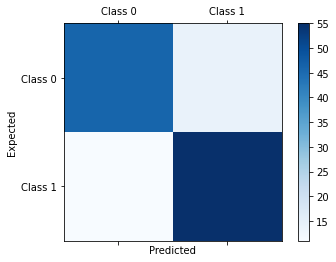

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_tree)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=500)

clf.fit(x_train,y_train)

y_pred_rf=clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_tree)*100)

80.15873015873017


### Matriz de confusão Random Forest

Confusion matrix:
 [[44 16]
 [ 6 60]]


/tmp/ipykernel_47914/4289424222.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_47914/4289424222.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


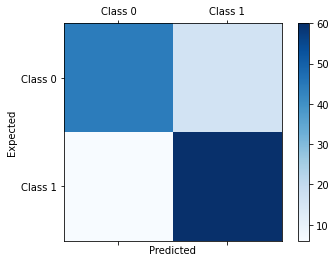

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()